In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy.stats import zscore, pearsonr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import networkx as nx
from sklearn.decomposition import PCA
plt.rcParams.update({'font.size': 20})

# Atelier: Analyse de réseaux - Épidémiologie

Animé par: Antoine Légaré et Gabriel Genest

In [196]:
class Epidemic:
    
    def __init__(self, N, I_0=1):
        self.N = N
        self.status = np.expand_dims(np.array([0] * N), axis=1)
        self.status[:I_0, 0] = 1
        np.random.shuffle(self.status)
        self.A = np.zeros((N, N)) 
        
    def initiateContacts(self, adjacencyMatrix):
        self.A = adjacencyMatrix
    
    def simulate(self, duration, p_infection=0.1, p_recovery=0.01):
        T = int(duration)
        status = np.zeros((self.N, T)).astype('int')
        status[:, 0] = self.status[:, -1]
        for i in range(1, T):
            recoveries = np.random.uniform(0, 1, self.N) > (1 - p_recovery)
            status[recoveries, i] = 0
            infectionProbabilities = p_infection * (self.A @ status[:, i-1])
            infections = np.random.uniform(0, 1, self.N) < infectionProbabilities
            status[infections, i] = 1
        self.status = np.append(self.status, status[:, 1:], axis=1)

In [197]:
def WSNetwork(N, k, p):
    G = nx.watts_strogatz_graph(N, k, p)
    matrix = nx.to_numpy_array(G)
    return matrix

In [202]:
epidemic = Epidemic(1000, I_0=100)
epidemic.initiateContacts(WSNetwork(1000, 10, 0.2))
epidemic.simulate(2500, p_infection=0.1, p_recovery=0.1)

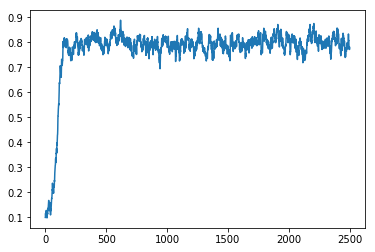

In [203]:
plt.plot(np.mean(epidemic.status, axis=0))